# Assignment: Build a Regression Model in Keras

## Introduction

This assignment was the final project in IBM's [Introduction to Deep Learning & Neural Networks with Keras](https://www.coursera.org/account/accomplishments/certificate/QQEVGBYCHYYP) course on Coursera. The objective: build a regression model to predict the compressive strength of concrete based on its age (in days) and the volumes of the different ingredients used to make it.

Each part of the assignment involved the following steps:

1. Randomly split the data into training and test sets, holding 30% for testing.
2. Build a neural network with hidden layers of 10 nodes each, using ReLU activation, Adam optimization, and a mean squared error loss function.
3. Train the model over a certain number of epochs.
4. Evaluate the model on the test data and compute the mean squared error between the predicted strength and actual strength.
5. Repeat the previous steps 50 times.
6. Report the mean and the standard deviation of the 50 mean squared errors.

The four parts differed as follows in terms of whether or not the input data was normalized, the number of hidden layers, and the number of epochs over which the model was trained:

- **Part A**: raw input data, 1 hidden layer, 50 epochs
- **Part B**: normalized input data, 1 hidden layer, 50 epochs
- **Part C**: normalized input data, 1 hidden layer, 100 epochs
- **Part D**: normalized input data, 3 hidden layers, 50 epochs

## Part A

### Download and clean the data

First step: download the dataset and save it as a pandas DataFrame.

In [1]:
import pandas as pd

concrete_data = pd.read_csv("https://cocl.us/concrete_data")
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Looks good. Next up, splitting between predictors (`X`) and target (`y`). Strength is the target variable.

In [2]:
X = concrete_data[concrete_data.columns[concrete_data.columns != "Strength"]]
num_cols = X.shape[1] # Saving for later

y = concrete_data["Strength"]

In [3]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [4]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

### Build the neural network

Next I'll build a function to create the neural network, with the number of hidden layers as a parameter, since Part D uses three hidden layers.

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense


def regression_model(num_hidden_layers):
    model = Sequential()

    # Hidden layers
    model.add(Dense(10, activation="relu", input_shape=(num_cols,)))
    for i in range(num_hidden_layers - 1):
        model.add(Dense(10, activation="relu"))

    # Output layer
    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

Using TensorFlow backend.


### Split, train, evaluate &times; 50

Now the fun part. I'm going to do the following 50 times:

- Randomly split the data by holding 30% for testing.
- Train a model on the training data over 50 epochs.
- Evaluate the model on the test data and compute the mean squared error between predicted concrete strength and actual concrete strength.

I'll save each of the 50 mean squared errors into a list.

And come to think of it, I'm going to define a function for this process, because I'm going to need to repeat it in all the other parts of the assignment, just varying a few key parameters.

Run #1 complete
Run #2 complete
Run #3 complete
Run #4 complete
Run #5 complete
Run #6 complete
Run #7 complete
Run #8 complete
Run #9 complete
Run #10 complete
Run #11 complete
Run #12 complete
Run #13 complete
Run #14 complete
Run #15 complete
Run #16 complete
Run #17 complete
Run #18 complete
Run #19 complete
Run #20 complete
Run #21 complete
Run #22 complete
Run #23 complete
Run #24 complete
Run #25 complete
Run #26 complete
Run #27 complete
Run #28 complete
Run #29 complete
Run #30 complete
Run #31 complete
Run #32 complete
Run #33 complete
Run #34 complete
Run #35 complete
Run #36 complete
Run #37 complete
Run #38 complete
Run #39 complete
Run #40 complete
Run #41 complete
Run #42 complete
Run #43 complete
Run #44 complete
Run #45 complete
Run #46 complete
Run #47 complete
Run #48 complete
Run #49 complete
Run #50 complete


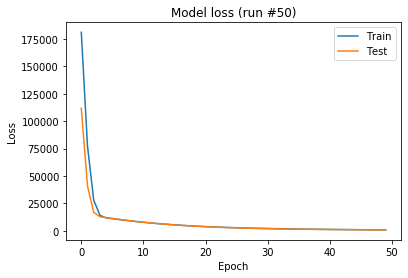

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot


def process_models(X, y, num_hidden_layers, num_epochs):
    mean_squared_errors = []

    for i in range(50):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Train the model
        model = regression_model(num_hidden_layers)
        hist = model.fit(
            X_train,
            y_train,
            epochs=num_epochs,
            verbose=0,
            validation_data=(X_test, y_test),
        )

        # Test the model
        predictions = model.predict(X_test)

        # Find and save the mean squared error
        mean_squared_errors.append(mean_squared_error(y_test, predictions))

        print("Run #{} complete".format(i + 1))

    # Plot the loss from the last run just for fun
    pyplot.plot(hist.history["loss"])
    pyplot.plot(hist.history["val_loss"])
    pyplot.title("Model loss (run #50)")
    pyplot.ylabel("Loss")
    pyplot.xlabel("Epoch")
    pyplot.legend(["Train", "Test"], loc="upper right")
    pyplot.show()

    return mean_squared_errors


errors_a = process_models(X, y, 1, 50)

### Results

I'll make a function for this part, too.

In [7]:
from statistics import mean, stdev


def report_results(mean_squared_errors):
    print(
        "The mean of the mean squared errors is {}".format(
            round(mean(mean_squared_errors), 3)
        )
    )
    print(
        "The standard deviation of the mean squared errors is {}".format(
            round(stdev(mean_squared_errors), 3)
        )
    )


report_results(errors_a)

The mean of the mean squared errors is 347.606
The standard deviation of the mean squared errors is 363.603


There you have it. I'll admit, those errors look pretty bad. I'm curious to see how the changes in the next three parts affect that.

## Part B

Same as Part A, but using a normalized version of the data. I'll normalize the predictors, then repeat the split/train/evaluate/repeat
process, then report the results.

Run #1 complete
Run #2 complete
Run #3 complete
Run #4 complete
Run #5 complete
Run #6 complete
Run #7 complete
Run #8 complete
Run #9 complete
Run #10 complete
Run #11 complete
Run #12 complete
Run #13 complete
Run #14 complete
Run #15 complete
Run #16 complete
Run #17 complete
Run #18 complete
Run #19 complete
Run #20 complete
Run #21 complete
Run #22 complete
Run #23 complete
Run #24 complete
Run #25 complete
Run #26 complete
Run #27 complete
Run #28 complete
Run #29 complete
Run #30 complete
Run #31 complete
Run #32 complete
Run #33 complete
Run #34 complete
Run #35 complete
Run #36 complete
Run #37 complete
Run #38 complete
Run #39 complete
Run #40 complete
Run #41 complete
Run #42 complete
Run #43 complete
Run #44 complete
Run #45 complete
Run #46 complete
Run #47 complete
Run #48 complete
Run #49 complete
Run #50 complete


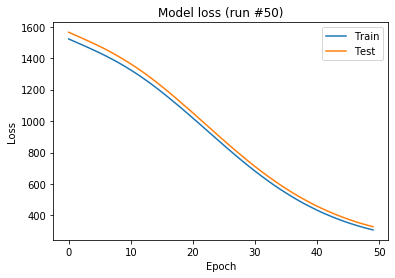

The mean of the mean squared errors is 381.438
The standard deviation of the mean squared errors is 110.781


In [8]:
X_norm = (X - X.mean()) / X.std()

errors_b = process_models(X_norm, y, 1, 50)
report_results(errors_b)

The mean of the mean squared errors is just the slightest bit higher than Part A, probably not significantly so. Curious. The standard deviation is much less, though. I assume the inputs vary less after normalizing?

## Part C

Same as Part B, but using 100 epochs for training. Here we go:

Run #1 complete
Run #2 complete
Run #3 complete
Run #4 complete
Run #5 complete
Run #6 complete
Run #7 complete
Run #8 complete
Run #9 complete
Run #10 complete
Run #11 complete
Run #12 complete
Run #13 complete
Run #14 complete
Run #15 complete
Run #16 complete
Run #17 complete
Run #18 complete
Run #19 complete
Run #20 complete
Run #21 complete
Run #22 complete
Run #23 complete
Run #24 complete
Run #25 complete
Run #26 complete
Run #27 complete
Run #28 complete
Run #29 complete
Run #30 complete
Run #31 complete
Run #32 complete
Run #33 complete
Run #34 complete
Run #35 complete
Run #36 complete
Run #37 complete
Run #38 complete
Run #39 complete
Run #40 complete
Run #41 complete
Run #42 complete
Run #43 complete
Run #44 complete
Run #45 complete
Run #46 complete
Run #47 complete
Run #48 complete
Run #49 complete
Run #50 complete


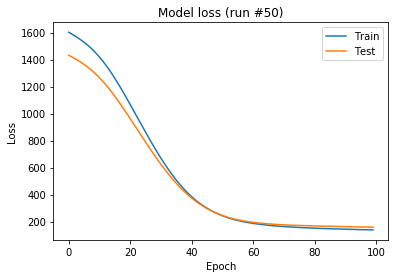

The mean of the mean squared errors is 161.423
The standard deviation of the mean squared errors is 16.934


In [9]:
errors_c = process_models(X_norm, y, 1, 100)
report_results(errors_c)

That significantly reduced both the mean _and_ the standard deviation of the mean squared errors compared to Part B. Nice.

## Part D

Last but not least, this one's the same as Part B but with _three_ hidden layers (each still with 10 nodes and ReLU activation). Sure am glad I made those functions in Part A.

Run #1 complete
Run #2 complete
Run #3 complete
Run #4 complete
Run #5 complete
Run #6 complete
Run #7 complete
Run #8 complete
Run #9 complete
Run #10 complete
Run #11 complete
Run #12 complete
Run #13 complete
Run #14 complete
Run #15 complete
Run #16 complete
Run #17 complete
Run #18 complete
Run #19 complete
Run #20 complete
Run #21 complete
Run #22 complete
Run #23 complete
Run #24 complete
Run #25 complete
Run #26 complete
Run #27 complete
Run #28 complete
Run #29 complete
Run #30 complete
Run #31 complete
Run #32 complete
Run #33 complete
Run #34 complete
Run #35 complete
Run #36 complete
Run #37 complete
Run #38 complete
Run #39 complete
Run #40 complete
Run #41 complete
Run #42 complete
Run #43 complete
Run #44 complete
Run #45 complete
Run #46 complete
Run #47 complete
Run #48 complete
Run #49 complete
Run #50 complete


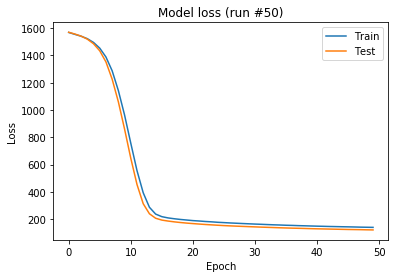

The mean of the mean squared errors is 130.296
The standard deviation of the mean squared errors is 14.269


In [10]:
errors_d = process_models(X_norm, y, 3, 50)
report_results(errors_d)

This is again a significant improvement over Part B (both the mean and standard deviation of the mean squared errors are much less), but not too much better than Part C. Fascinating.

## Reflection

What I'm still wondering the most now is how one goes about designing the size and shape of a neural network. I've gotten good at _building_ a network with the Keras API now if I'm told how many layers to use, how many nodes in each of those layers, how many epochs to train it over. But how do you make those decisions for each new dataset and problem?

That's what I intend to learn next.